## Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import random
import math

## Data

In [2]:
data=pd.read_csv("Ads_CTR_Optimisation.csv")

## Implementantions

### Random selection

In [15]:
N=10000
d=10
anuncios_seleccionados=[]
recompensa_total=0
for n in range(0,N):
    anuncio=random.randrange(d)
    anuncios_seleccionados.append(anuncio)
    recompensa=data.values[n,anuncio]
    recompensa_total=recompensa_total+recompensa

In [16]:
recompensaRandom=recompensa_total

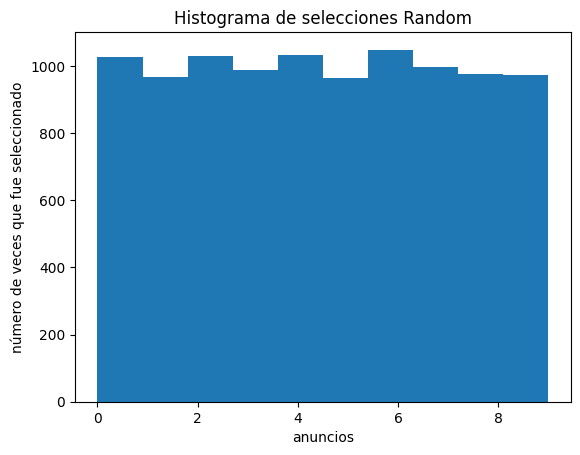

In [5]:
plt.hist(anuncios_seleccionados)
plt.title("Histograma de selecciones Random")
plt.xlabel("anuncios")
plt.ylabel("número de veces que fue seleccionado")
plt.show()

### Upper Bound Confidence 

In [6]:
N=10000
d=10
anuncio=0
numeroDeSelecciones=[0]*d
sumaDeLasRecompensas=[0]*d
anuncios_seleccionados=[]
recompensaTotal=0
for n in range(0,N):
    maximo_intervalo_superior=0;
    for i in range(0,d):
        if numeroDeSelecciones[i]>0:
            recompensamedia=sumaDeLasRecompensas[i]/numeroDeSelecciones[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/numeroDeSelecciones[i])
            intervalodeconfianzasuperior=recompensamedia+delta_i
        else:
            intervalodeconfianzasuperior= i*400*10#ie400
        if intervalodeconfianzasuperior>maximo_intervalo_superior:
            maximo_intervalo_superior=intervalodeconfianzasuperior
            anuncio=i
    anuncios_seleccionados.append(anuncio)
    numeroDeSelecciones[anuncio]=numeroDeSelecciones[anuncio]+1
    recompensa=data.values[n,anuncio]
    sumaDeLasRecompensas[anuncio]=sumaDeLasRecompensas[anuncio]+recompensa
    recompensaTotal=recompensaTotal+recompensa

In [7]:
recompensaUBC= recompensa_total

Text(0, 0.5, 'Fracuencia de la visualizacion del anuncio')

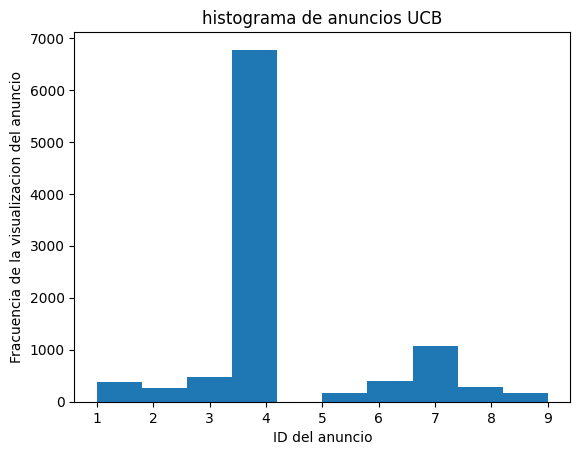

In [8]:
plt.hist(anuncios_seleccionados)
plt.title("histograma de anuncios UCB")
plt.xlabel("ID del anuncio")
plt.ylabel("Fracuencia de la visualizacion del anuncio")

### Thompson Sampling

In [9]:
N=10000
d=10
numerodeRecompensas1=[0.000001]*d
numerodeRecompensas0=[0.000001]*d
anuncios_seleccionados=[]
recompensaTotal=0
for n in range(0,N):
    maximo_valor_aleatorio=0;
    anuncio=0
    for i in range(0,d):
        random_beta=random.betavariate(numerodeRecompensas1[i]+1,numerodeRecompensas0[i]+0)
        if random_beta>maximo_valor_aleatorio:
            maximo_valor_aleatorio=random_beta
            anuncio=i
    anuncios_seleccionados.append(anuncio)
    recompensa=data.values[n,anuncio]
    if recompensa==1:
        numerodeRecompensas1[anuncio]+=1
    else:
        numerodeRecompensas0[anuncio]+=1
    recompensaTotal+=recompensa

In [10]:
recompensaThompson= recompensa_total

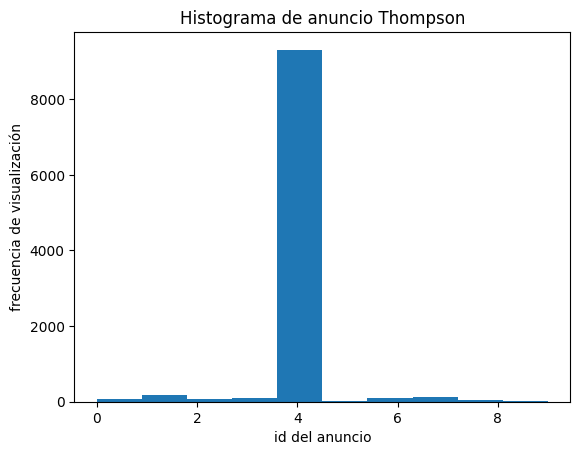

In [12]:
plt.hist(anuncios_seleccionados)
plt.title('Histograma de anuncio Thompson')
plt.xlabel("id del anuncio")
plt.ylabel("frecuencia de visualización")
plt.show()

In [34]:
(recompensaUBC,recompensaThompson)

(1288, 1288)

In [14]:
print(f"Recompensa Random: {recompensaRandom} \nRecompensa UCB: {recompensaUBC} \nRecompensa Thompson: {recompensaThompson}")

Recompensa Random: 1117 
Recompensa UBC: 1235 
Recompensa Thompson: 1235
